(target-sse-gradient)=
# $SSE$ gradiënt

In deze sectie concentreren we ons eerst op de $SSE$ functie in het (triviale) geval dat we een linear regressiemodel hebben met enkel een _intercept_ ($\pmb{b} = [b_1]^T$). We krijgen dan een U-vormige curve te zien zoals hieronder afgebeeld. Pas in tweede instantie kijken we naar modellen met één of meerdere _predictoren_ $\pmb{b} = [b_1, b_2, \ldots]^T$.

:::{tip}
Je kunt een gelijkaardige curve zien wanneer je in de 3D visualisatie uit de vorige secties, het assenstelsel zó draait rond de verticale ($SSE$) as, dat je recht op de $b_2$-as kijkt.
:::

In [1]:
from ml_courses.sim.derivative_viz import DerivativeVisualization

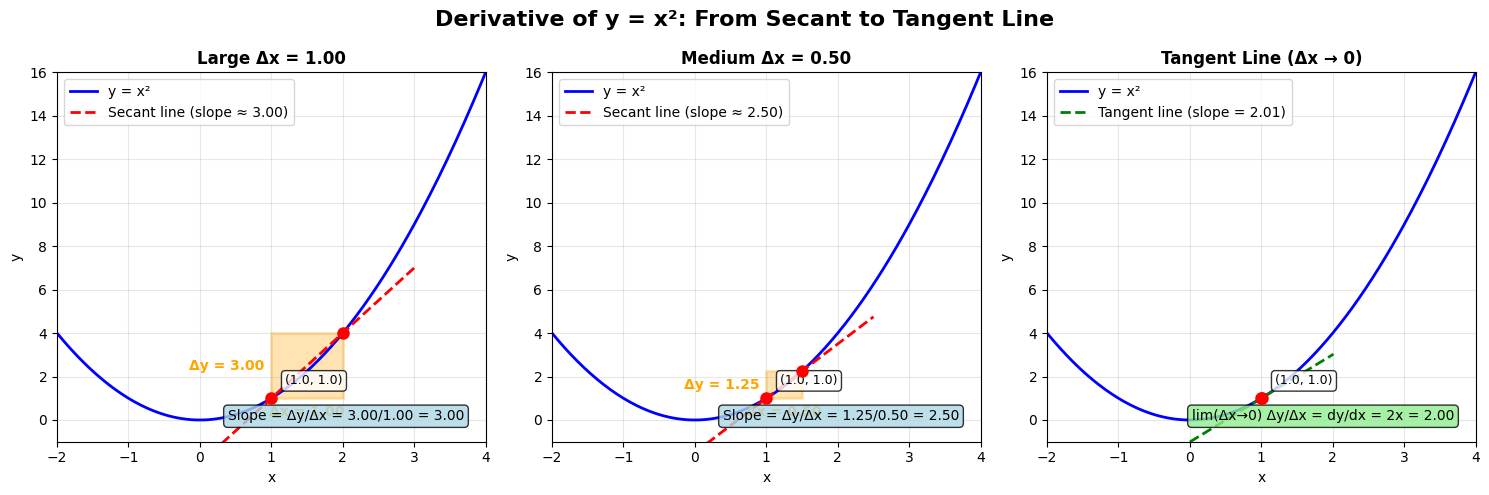

In [2]:
dv = DerivativeVisualization()
dv.plot()

(target-derivative)=
Bij de Monte Carlo sampling leveren we ons over aan het _willekeurig aftasten_ van de $SSE$ functie. We zochten steeds naar een richting in de ruimte waarin we een _stapje naar beneden_ konden zetten. Het is echter wiskundig perfect mogelijk om op ieder punt te bepalen in welke richting de daling het grootst zal zijn. Dit brengt ons bij het concept van een **_raak- of tangentlijn_ op een bepaald punt van een functie waarvan de richtingscoëfficient (of _slope_) de "_afgeleide_" van die functie in dat punt wordt genoemd**. De raak-/tangentlijn van een functie $f$ in het punt $x$ moet gezien worden als de **_lokale lineaire benadering_ van die functie in dat punt**. Het bepalen van die lokale benadering (en dus de afgeleide) heet **het differentiëren van functies**.

## Afgeleide van een kwadratische functie
De illustratie hierboven toont het principe van een afgeleide in het geval van een enkelvoudige kwadratische functie: 

$$f(x) = x^2$$

:::{warning}
Dit is nog **_niet_** het specifieke geval van de SSE functie. Daar hebben we te maken met sommen van kwadraten.
:::

We beginnen met een rechte die de kwadratische functie op twee punten _snijdt_: $(x_1, y_1)$ en $(x_2, y_2)$. Om de richtingscoëfficient te bepalen, rekenen we gewoon de verhouding uit tussen de afstand op de $y$-as ($\Delta y = y_2 - y_1$) en de afstand op de $x$-as ($\Delta x = x_2 - x_1$).

$$
\begin{aligned}
\frac{\Delta y}{\Delta x}
&= \frac{y_2 - y_1}{\Delta x} \cr
&= \frac{f(x_1 + \Delta x) - f(x_1)}{\Delta x} \cr
&= \frac{(x_1 + \Delta x)^2 - x_1^2}{\Delta x} \cr
&= \frac{x_1^2 + 2x_1\Delta x + \Delta x^2 - x_1^2}{\Delta x} \cr
&= \frac{2x_1\Delta x + \Delta x^2}{\Delta x} \cr
&= 2x_1 + \Delta x
\end{aligned}
$$

(target-tangent-line)=
Dit geeft al een eerste idee van de richting waarin de kwadratische functie daalt. We kunnen een preciezere richting krijgen door het interval kleiner en kleiner te maken. **In het theoretisch kleinste interval ($\lim_{\Delta x\to 0}$) spreken we niet meer van een snijlijn, maar een raak- of tangentlijn in een bepaald punt en niet meer van de richtingscoëfficient van die lijn, maar van de "_afgeleide_" van de functie in dat punt**. Als we in het bovenstaande geval $\Delta x$ op $0$ zetten, krijgen we:

$$
\begin{aligned}
\lim_{\Delta x\to 0} \frac{\Delta y}{\Delta x} &= \frac{\partial y}{\partial x} \cr
&= 2x
\end{aligned} 
$$

:::{note}
Het minimum van de kwadratische functie $f(x) = x^2$ is het punt waar de raaklijn perfect horizontaal loopt. Hier is de afgeleide $0$. Dit is altijd het punt waar $x=0$.
:::

## Afgeleide van de $SSE$ met $\pmb{b} = [b_1]^T$ 
Bij de $SSE$ functie hebben we te maken met de **_som_** van $M$ kwadratische functies. Iedere individuele functie heeft de vorm:

$$
f(y_i - \hat{y_i}) = (y_i - \hat{y_i})^2
$$

of

$$
f(d_i) = {d_i}^2
$$

waarbij $d_i$ het verschil is tussen een bepaalde model output $\hat{y_i}$ en de overeenkomstige target waarde $y_i$.
We weten intussen dat de afgeleide hier $2d_i$ ofwel $2(y_i - \hat{y_i})$ is.
  
Maar we hebben bij de $SSE$ dus te maken met de _som_ van alle verschillen tussen model outputs en target values in onze training data:

$$
\begin{aligned}
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y}) &= \sum_{i=1}^M(y_i-f(x_i))^2 \cr
&= \sum_{i=1}^M(y_i-\hat{y_i})^2 \cr
&= (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \ldots + (y_m - \hat{y_m})^2 \cr
&= {d_1}^2 + {d_2}^2 + \ldots + {d_m}^2
\end{aligned}
$$ 

### De _som-regel_
De _som-regel_ houdt in dat **voor iedere functie $g$ en $h$, de afgeleide van hun som $g + h$ gelijk is aan de som van de individuele afgeleides $g'$ en $h'$**:

als
$$
f = g + h
$$
dan
$$
f' = g' + h'
$$

We krijgen dus

$$
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y})' = 2d_1 + 2d_2 + \ldots + 2d_m
$$

In het geval van een model met enkel een intercept ($\pmb{b} = [b_1]^T$) krijgen we:

$$
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y})' = \frac{\partial SSE}{\partial b_1} = 2\sum_{i=1}^M(y_i-b_1)
$$

Wanneer we de ideale waarde voor $b_1$ willen vinden, kunnen we deze afgeleide gelijk stellen aan $0$ ($\to$ horizontale tangentlijn):

$$
\begin{align}
0 &= 2\sum_{i=1}^M(y_i-\hat{b_1}) \cr
0 &= \sum_{i=1}^M(y_i-\hat{b_1}) \cr
0 &= (\sum_{i=1}^My_i) - M\hat{b_1} \cr
M\hat{b_1} &= \sum_{i=1}^My_i \cr
\hat{b_1} &= \frac{\sum_{i=1}^My_i}{M}
\end{align}
$$

De beste estimate is met andere woorden gelijk aan het gemiddelde van alle trainingsdata $y_i$.



(partial-target)=
## Gradiënt van de $SSE$ met $\pmb{b} = [b_1, b_2]^T$

In het geval van $\pmb{b} = [b_1, b_2]^T$ neemt de $SSE$ de vorm aan van een oppervlakte (zoals reeds geïllustreerd bij de grid search en monte carlo sampling). We drukken de afgeleide dan ook uit in twee dimensies:

$$
\mathcal{L}_{SSE}(f(\pmb{x}); \pmb{y})' = \nabla{SSE} = \begin{bmatrix}
\frac{\partial SSE}{\partial b_1} \cr
\frac{\partial SSE}{\partial b_2}
\end{bmatrix}
$$

(target-partial-derivative)=
De elementen $\frac{\partial SSE}{\partial b_1}$ en $\frac{\partial SSE}{\partial b_2}$ worden de **partiële afgeleiden** van de $SSE$ functie genoemd. Samen vormen ze de **gradiënt** van de $SSE$ functie $\nabla{SSE}$. **De gradiënt verbreedt met andere woorden het concept van de _afgeleide_ naar het geval van meerdere onbekenden.**

Om een ideale oplossing voor $[b_1, b_2]^T$ te vinden, kunnen we dus de $SSE$ gradiënt gelijk stellen aan $\pmb{0}$:

$$
\nabla{\mathcal{L}_{SSE}} = \pmb{0} = \begin{bmatrix}
0 \cr
0
\end{bmatrix}
$$

Daarvoor moeten we eerst de partiële afgeleiden uitwerken.

1. **De partiële afgeleide $\frac{\partial SSE}{\partial b_1}$ vertelt ons hoe de $SSE$ verandert in functie van $b_1$, terwijl we $b_2$ constant houden**.

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{SSE}}{\partial b_1} &= \frac{\partial}{\partial b_1}\begin{bmatrix}
\sum_{i=1}^M(y_i - \hat{y_i})^2
\end{bmatrix} \cr
&= \frac{\partial}{\partial b_1}\begin{bmatrix}
\sum_{i=1}^M(y_i - b_1 - b_2x_i)^2
\end{bmatrix}
\end{aligned}
$$

Gegeven de som-regel krijgen we

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{SSE}}{\partial b_1} &= 
\sum_{i=1}^M\frac{\partial}{\partial b_1}(y_i - b_1 - b_2x_i)^2
\end{aligned}
$$

### De _ketting-regel_
We krijgen hier te maken met twee _geneste functies_:
$$
h(b_1, b_2) = y_i - b_1 - b_2x_i
$$
en
$$
g(h(b_1, b_2)) = h(b_1, b_2)^2 = (y_i - b_1 - b_2x_i)^2
$$

(target-chain-rule)=
De _ketting-regel_ houdt in dat bij geneste functies $g(h(x))$, de afgeleide naar $x$ het product is van de afgeleiden, beginnend bij de buitenste functie.

$$
\frac{\partial}{\partial x}g(h(x)) = \frac{\partial g}{\partial h}\frac{\partial h}{\partial x}
$$

Voor de afgeleide van de buitenste functie krijgen we (zie afgeleide van kwadratische functie):

$$
\frac{\partial g}{\partial h} = 2(y_i - b_1 - b_2x_i)
$$

Voor de binnenste afgeleide kunnen we de functie $y_i - b_1 - b_2x_i$ eerst vereenvoudigen naar $c - b_1$. Dit is mogelijk omdat $y_i$ en $x_i$ gekend zijn en we $b_2$ in deze partiële afgeleide als constant beschouwen. We kunnen de termen $y_i - b_2x_i$ voorstellen als een gegeven constante $c$. Zo krijgen we

$$
\begin{align}
\frac{\partial h}{\partial x} &= \frac{\partial}{\partial b_1}(c - b_1) \cr
&= -1
\end{align}
$$

Als we $c - b_1$ geometrisch voorstellen krijgen we namelijk een rechte met $-1$ als richtingscoëfficiënt (dus de afgeleide is ook $-1$):

In [3]:
import matplotlib.pyplot as plt
import numpy as np

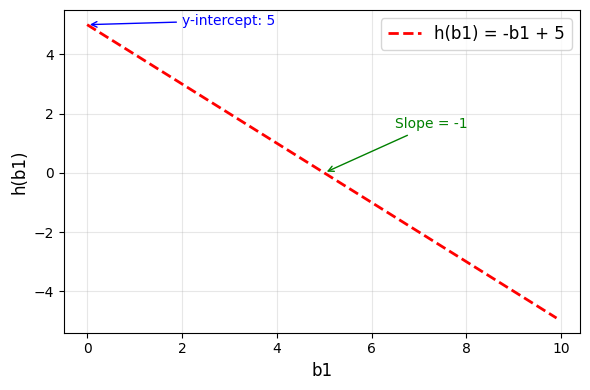

In [4]:
b1 = np.arange(0, 10, 0.1)
c = 5
h_b1 = -b1 + c

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(b1, h_b1, "r--", linewidth=2, label=f"h(b1) = -b1 + {c}")

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Set labels and title
ax.set_xlabel("b1", fontsize=12)
ax.set_ylabel("h(b1)", fontsize=12)

# Add legend
ax.legend(fontsize=12)

# Add annotations to highlight key features
ax.annotate(
    f"y-intercept: {c}",
    xy=(0, c),
    xytext=(2, c),
    arrowprops={"arrowstyle": "->", "color": "blue"},
    fontsize=10,
    color="blue",
)

ax.annotate(
    "Slope = -1",
    xy=(5, 0),
    xytext=(6.5, 1.5),
    arrowprops={"arrowstyle": "->", "color": "green"},
    fontsize=10,
    color="green",
)

plt.tight_layout()
plt.show()

Als we de ketting regel (dus het product van $\frac{\partial g}{\partial h}$ en $\frac{\partial h}{\partial x}$) volledig toepassen krijgen we:

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{SSE}}{\partial b_1} &=
\sum_{i=1}^M2(y_i - b_1 - b_2x_i)(-1) \cr
&=
\sum_{i=1}^M-2(y_i - b_1 - b_2x_i) \cr
&=
-2\sum_{i=1}^M(y_i - b_1 - b_2x_i)
\end{aligned}
$$

2. **De partiële afgeleide $\frac{\partial \mathcal{L}_{SSE}}{\partial b_2}$ vertelt ons hoe de $SSE$ verandert in functie van $b_2$, terwijl we $b_1$ constant houden**.

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{SSE}}{\partial b_2} &= 
\sum_{i=1}^M\frac{\partial}{\partial b_2}(y_i - b_1 - b_2x_i)^2
\end{aligned}
$$

Gezien de ketting-regel krijgen we hier:

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{SSE}}{\partial b_2} &=
\sum_{i=1}^M2(y_i - b_1 - b_2x_i)(-x_i) \cr
&=
-2\sum_{i=1}^M(y_i - b_1 - b_2x_i)x_i
\end{aligned}
$$

De term $(-x_i)$ komt nu van de afgeleide van $y_i - b_1 - b_2x_i$ naar $b_2$. Aangezien we bij deze partiële afgeleide $b_1$ als gegeven beschouwen (en $y_i$ en $x_i$ ook gegeven zijn), kunnen we de binnenste functie herschrijven als $h(b_2) = c - x_ib_2$. Geometrisch komt dit overeen met een rechte met _slope_ $-x_i$.

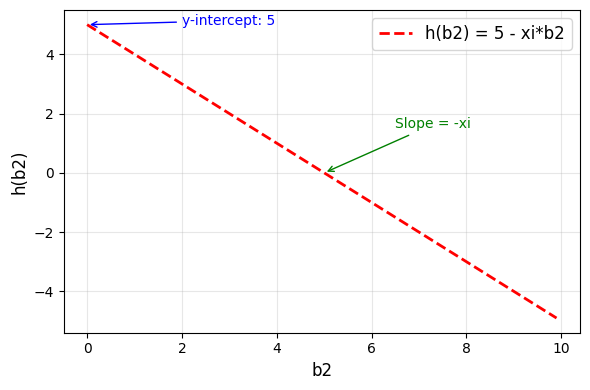

In [5]:
b2 = np.arange(0, 10, 0.1)
c = 5
xi = 10
h_b2 = c + -xi * b1

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(b1, h_b1, "r--", linewidth=2, label=f"h(b2) = {c} - xi*b2")

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Set labels and title
ax.set_xlabel("b2", fontsize=12)
ax.set_ylabel("h(b2)", fontsize=12)

# Add legend
ax.legend(fontsize=12)

# Add annotations to highlight key features
ax.annotate(
    f"y-intercept: {c}",
    xy=(0, c),
    xytext=(2, c),
    arrowprops={"arrowstyle": "->", "color": "blue"},
    fontsize=10,
    color="blue",
)

ax.annotate(
    "Slope = -xi",
    xy=(5, 0),
    xytext=(6.5, 1.5),
    arrowprops={"arrowstyle": "->", "color": "green"},
    fontsize=10,
    color="green",
)

plt.tight_layout()
plt.show()

Uiteindelijk krijgen we dus:

$$
\nabla{\mathcal{L}_{SSE}} = \begin{bmatrix}
-2\sum_{i=1}^M(y_i - b_1 - b_2x_i) \cr
-2\sum_{i=1}^M(y_i - b_1 - b_2x_i)x_i
\end{bmatrix}
$$

en zoeken we de oplossing voor de waarden $b_1$ en $b_2$ waarbij de helling in het SSE oppervlak $\pmb{0}$ is:

$$
\begin{bmatrix}
0 \cr
0
\end{bmatrix} = \begin{bmatrix}
-2\sum_{i=1}^M(y_i - \hat{b_1} - \hat{b_2}x_i) \cr
-2\sum_{i=1}^M(y_i - \hat{b_1} - \hat{b_2}x_i)x_i
\end{bmatrix}
$$

(target-gradient)=
## Gradiënt van de $SSE$ met $\pmb{b} = [b_1, b_2, ...]^T$

In het algemene geval van een $SSE$ met $N$ lineaire predictoren hebben we te maken met een $N$-dimensioneel $SSE$ _hypersurface_. Voor de gradiënt krijgen we:

$$
\nabla{\mathcal{L}_{SSE}} = \begin{bmatrix}
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}b_j)(x_{i,1}) \cr
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}b_j)(x_{i,2}) \cr
\vdots \cr
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}b_j)(x_{i,n})
\end{bmatrix}
$$

en zoeken we een oplossing voor:

$$
\begin{bmatrix}
0 \cr
0 \cr
\vdots \cr
0
\end{bmatrix} = \begin{bmatrix}
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}\hat{b_j})(x_{i,1}) \cr
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}\hat{b_j})(x_{i,2}) \cr
\vdots \cr
-2\sum_{i=1}^M(y_i - \sum_{j=1}^Nx_{ij}\hat{b_j})(x_{i,n})
\end{bmatrix}
$$

Als we dit herordenen krijgen we voor iedere $\hat{b_k}$ in de vector van partiële afgeleiden, de volgende vergelijking:

$$
\sum_{i=1}^M\sum_{j=1}^Nx_{ik}x_{ij}\hat{b_j} = \sum_{i=1}^Mx_{ik}y_i
$$

met

$$
k = 1, 2, \ldots, n
$$

Deze vergelijkingen worden de _normal equations_ genoemd en kunnen als volgt in compacte matrixvorm geschreven worden:

$$
(\pmb{X}^T\pmb{X})\hat{\pmb{b}} = \pmb{X}^T\pmb{y}
$$

De oplossing voor $\hat{\pmb{b}}$ wordt dan:

$$
\hat{\pmb{b}} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{y}
$$

:::{important}
(target-ols)=
We kunnen _in theorie_ via de inverse $(\pmb{X}^T\pmb{X})^{-1}$ en matrix multiplicatie de zogenaamde **_ordinary least squares_** (_OLS_) oplossing voor $\hat{\pmb{b}}$ uitrekenen. Deze oplossing is puur analytisch; we bekwamen ze louter door te redeneren over de gradiënt van de _loss_ functie. Ze is niet iteratief en wordt ook soms de _closed form_ oplossing voor het lineaire regressiemodel genoemd.
:::
